# Introduction

In [1]:
# importing numpy, pandas & matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
%matplotlib inline

# What is Data?

- A dataset consists of multiple data rows.
- Each row describes an item with its features.
- Think of features as properties of a sample. E.g. an apple has **color**, **size**, **kind**, ...

In [2]:
# Load Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

- We separate dataset into **features** and **labels** matrices.
- Features could be vectors (data rows has only 1 feature), Matrices (having multiple features) or Tensors (each feature is itself another matrix or tensor)
- Labels could be vectors, matrices or tensors too.
- Usually features are matrices and we declare it by `X` and lables are vectors declared by `y`.
- We declare the dataset size as the number of data items in it.

In [5]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

In [6]:
print('X.shape =', X.shape)
print('y.shape =', y.shape)

X.shape = (150, 4)
y.shape = (150,)


In [7]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

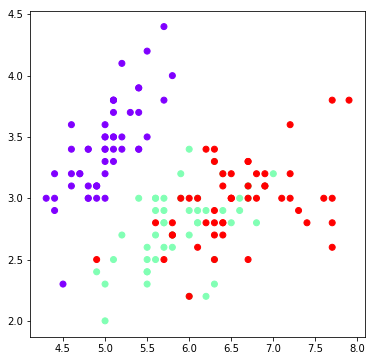

In [9]:
plt.figure(figsize=(6, 6));
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, cmap=plt.cm.rainbow);

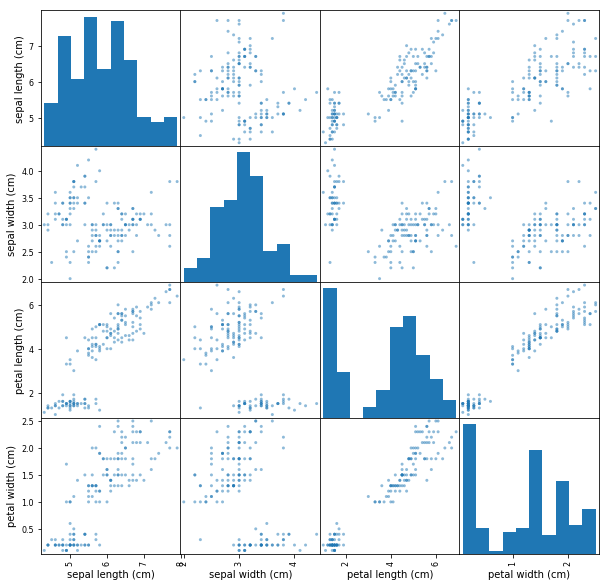

In [10]:
# Correlation plots are a good way to understand the dataset
pd.plotting.scatter_matrix(X, figsize=(10, 10));

---
# Supervised Learning
TODO

## Regression
TODO

### Prepare the data

- First we prepare the data and preprocess it.
- Standardization, Normalization and Imputation are the common preprocesses.

In [11]:
from sklearn.datasets import load_boston
boston = load_boston()

In [12]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [13]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [14]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

In [15]:
print('X.shape =', X.shape)
print('y.shape =', y.shape)

X.shape = (506, 13)
y.shape = (506,)


In [16]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

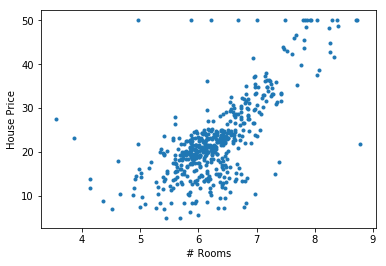

In [18]:
plt.scatter(X.RM, y, marker='.');
plt.xlabel('# Rooms');
plt.ylabel('House Price');

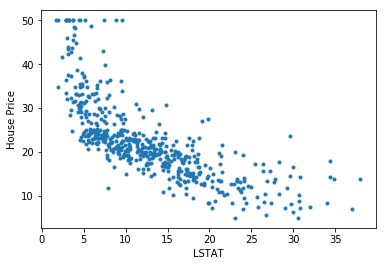

In [19]:
plt.scatter(X.LSTAT, y, marker='.');
plt.xlabel('LSTAT');
plt.ylabel('House Price');

In [20]:
X = X.RM

### Train/Test Split

- In order to reguralize the model, we split the dataset into **training** and **test** sets.
- Training and test sets are similar in shape except in size.
- Usually training set is the bigger part of the dataset (e.g. 80%) and the rest is test set (e.g. 20%).

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(X.shape[0], 1),
                                                    y.values.reshape(y.shape[0], 1),
                                                    test_size=.3)

In [22]:
print('X_train.shape =', X_train.shape)
print('X_test.shape =', X_test.shape)
print('y_train.shape =', y_train.shape)
print('y_test.shape =', y_test.shape)

X_train.shape = (354, 1)
X_test.shape = (152, 1)
y_train.shape = (354, 1)
y_test.shape = (152, 1)


### Train the model on the training set

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

### Evaluate on the test set

In [24]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error
print('Mean squared error =', mean_squared_error(y_test, y_pred))

Mean squared error = 46.4310404601


In [26]:
print('Linear Regression score = %.2f%%' % (model.score(X_test, y_test) * 100))

Linear Regression score = 48.50%


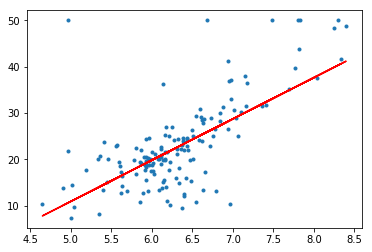

In [27]:
plt.scatter(X_test, y_test, marker='.');
plt.plot(X_test, y_pred, color='red');

### The model is ready and can be used to predict on real data

---
## Classification
TODO

### Prepare the data

- Just like regression.

In [28]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [29]:
X = pd.DataFrame(mnist.data)
y = pd.Series(mnist.target)

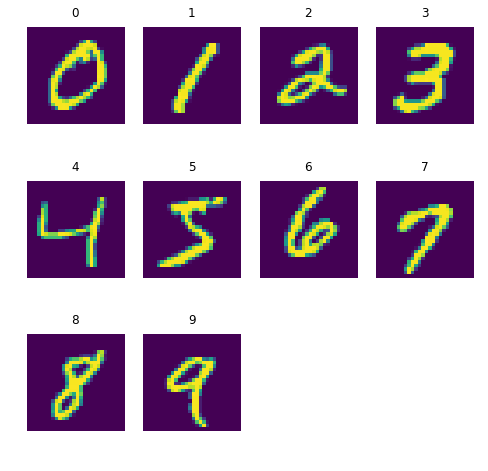

In [30]:
f, axes = plt.subplots(3, 4, figsize=(8, 8));
for i in range(3):
    for j in range(4):
        axes[i, j].axis('off')
        if i == 2 and j >= 2:
            continue
        num = i * 4 + j
        axes[i, j].set_title(num)
        axes[i, j].matshow(X.values[y == num][0].reshape(28, 28))

### Train/Test Split

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, shuffle=False)

In [32]:
print('X_train.shape =', X_train.shape)
print('y_train.shape =', y_train.shape)
print('X_test.shape =', X_test.shape)
print('y_test.shape =', y_test.shape)

X_train.shape = (60000, 784)
y_train.shape = (60000,)
X_test.shape = (10000, 784)
y_test.shape = (10000,)


### Train the model on the training set

In [33]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier().fit(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


### Evaluate on the test set

In [34]:
print('SGD Classifier score = %.2f%%' % (model.score(X_test, y_test) * 100))

SGD Classifier score = 89.13%


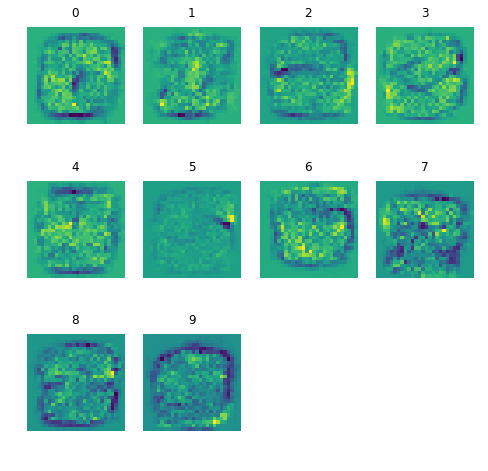

In [35]:
f, axes = plt.subplots(3, 4, figsize=(8, 8));
for i in range(3):
    for j in range(4):
        axes[i, j].axis('off')
        if i == 2 and j >= 2:
            continue
        axes[i, j].set_title(i * 4 + j)
        axes[i, j].matshow(model.coef_[i * 4 + j].reshape(28, 28))

#### Truely Classified Digits

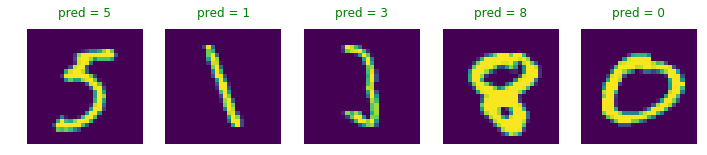

In [36]:
y_pred = model.predict(X_test)
f, axes = plt.subplots(1, 5, figsize=(12, 4))
samples = random.sample(list(y_test[y_test == y_pred].iteritems()), 5)
for i_zero, (i, p) in enumerate(samples):
    axes[i_zero].axis('off')
    axes[i_zero].matshow(X_test.loc[i].values.reshape(28, 28))
    axes[i_zero].set_title('pred = %d' % y_pred[i - 60000], color='green')

#### Misclassified Digits

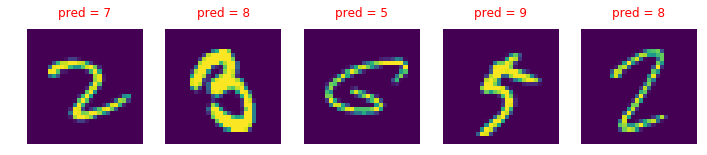

In [37]:
y_pred = model.predict(X_test)
f, axes = plt.subplots(1, 5, figsize=(12, 4))
samples = random.sample(list(y_test[y_test != y_pred].iteritems()), 5)
for i_zero, (i, p) in enumerate(samples):
    axes[i_zero].axis('off')
    axes[i_zero].matshow(X_test.loc[i].values.reshape(28, 28))
    axes[i_zero].set_title('pred = %d' % y_pred[i - 60000], color='red')

---
## Unsupervised Learning
TODO

### Clustering
TODO

### Prepare the data

- Like supervised learning, we first gather and preprocess the data.
- The difference is that there is no lables vector in clusterin. Only features (X).
- Also train/test split doesn't make sense since there is no true lable to compute the score.
- There are (fortunately!) some evaluation metrics but they work on the whole dataset.
- Some other evaluation metrics work when the true labels are provided.

In [38]:
from sklearn.datasets import make_moons
X, y = make_moons(1000, noise=.05)

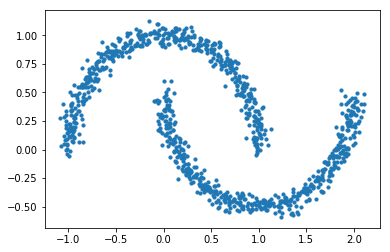

In [39]:
plt.scatter(X[:, 0], X[:, 1], s=10);

### Train the model on whole dataset

In [40]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=.2).fit(X)

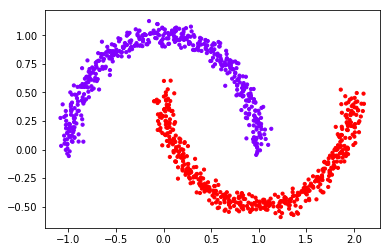

In [41]:
plt.scatter(X[:, 0], X[:, 1], s=10, c=model.labels_, cmap=plt.cm.rainbow);

In [42]:
from sklearn.metrics import adjusted_rand_score
print('Adjusted rand index =', adjusted_rand_score(y, model.labels_))

Adjusted rand index = 1.0


## PCA
TODO

In [43]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

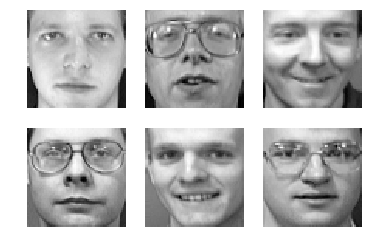

In [44]:
plt.subplots(2, 3)
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.axis('off')
    plt.imshow(faces.images[10 * i].reshape(64, 64), cmap=plt.cm.gray)

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [46]:
faces.data = StandardScaler().fit_transform(faces.data)
pca = PCA().fit(faces.data)

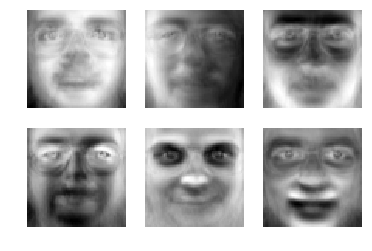

In [47]:
plt.subplots(2, 3)
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.axis('off')
    plt.imshow(pca.components_[i].reshape(64, 64), cmap=plt.cm.gray_r)